In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import plt
import pylab 

In [165]:
reviews = pd.read_csv('winemag-data-130k-v2.csv')
reviews.drop(columns=['Unnamed: 0', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], inplace=True)
reviews = reviews[reviews['price']<100]
reviews.shape

(117024, 8)

In [166]:
reviews.head(5)

,country,description,designation,points,price,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


Data Exploration ! todo

In [28]:
#preprocessing drop dupliated data
reviews = reviews.drop_duplicates(['title','description'])
reviews.shape

(119988, 8)

In [29]:
#scatter plot
cols_name = reviews.columns.values
reviews.describe(include='all')

,country,description,designation,points,price,title,variety,winery
count,119929,119988,85443,119988.000000,111593.000000,119988,119987,119988
unique,43,119955,37979,NaN,NaN,118840,707,16757
top,US,Lifted pear-drop aromas are accompanied by the...,Reserve,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,NaN,NaN,9,12278,211
mean,NaN,NaN,NaN,88.442236,35.620747,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,42.103728,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN


Price | points | Country | distribution? relation? ! todo

Frequent taste | quality | good | bad todo

NUERAL NEXT WORK REVIEW -> POINTS?

In [7]:
np.unique(reviews['points'], return_counts = True)

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100], dtype=int64),
 array([  397,   692,  1836,  3025,  6480,  9530, 12600, 16933, 17207,
        12226, 15410, 11359,  9613,  6489,  3758,  1535,   523,   229,
           77,    33,    19], dtype=int64))

In [141]:
df1 = pd.DataFrame(data.groupby('country')['description'].count())

country    43
dtype: int64

In [167]:
reviews.groupby('country')['description'].count()

country
Argentina                  3656
Armenia                       2
Australia                  2183
Austria                    2775
Bosnia and Herzegovina        2
Brazil                       47
Bulgaria                    140
Canada                      253
Chile                      4372
China                         1
Croatia                      71
Cyprus                       11
Czech Republic               12
England                      69
France                    16674
Georgia                      84
Germany                    2006
Greece                      461
Hungary                     139
India                         9
Israel                      485
Italy                     16143
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       68
Moldova                      59
Morocco                      28
New Zealand                1365
Peru                         16
Portugal                   4779


In [79]:
#region & prices & points distribution
reviews_region_prices = reviews[reviews['price'] <= 100][['country', 'price']]
reviews_region_prices.head(5)

,country,price
1,Portugal,15.0
2,US,14.0
3,US,13.0
4,US,65.0
5,Spain,15.0


(array([  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]), array([   5,   12,   29,  112,  244,  217,  797,  461,  904,  790,  998,
       1666, 1186,  790, 1957,  841, 2525,  387, 1460,  537, 1441, 2621,
        832,  488, 1763,  609, 2385,   62, 1214,  218,  604, 2070,  918,
        208, 1161,  495, 1993,   72,  926,   82,  355, 1790,  215,   91,
        930,  281, 1792,   12,  299,   51,  192, 1147,  141,   23,

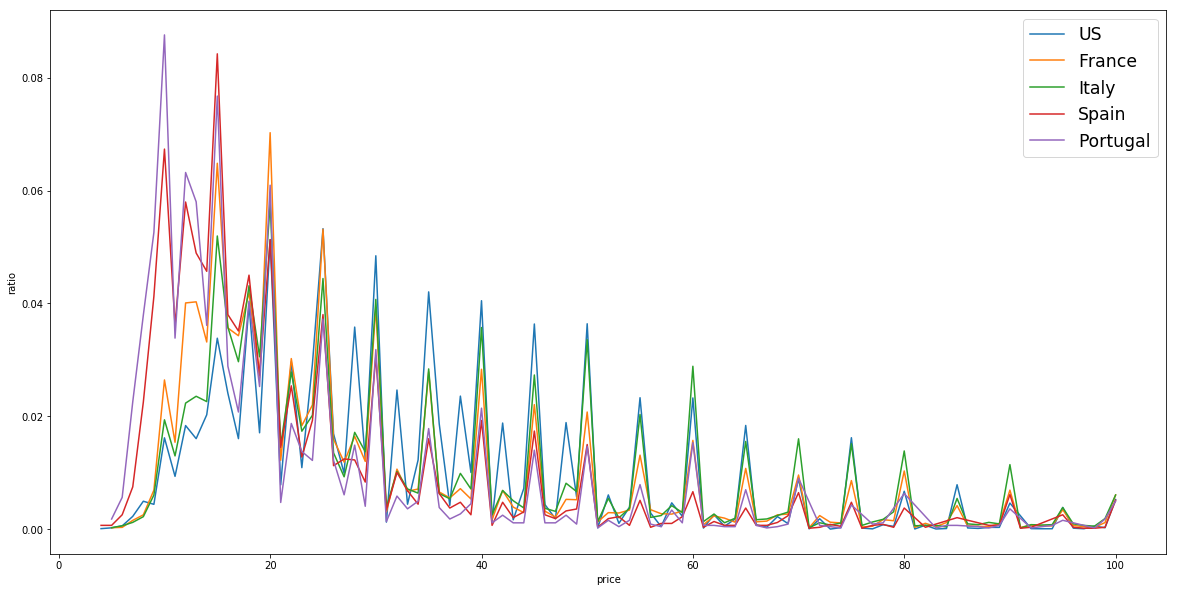

In [160]:
plt.figure(figsize=(20,10))
plt.xlabel('price')
plt.ylabel('ratio')
for country in ['US', 'France', 'Italy', 'Spain', 'Portugal']:
    prices_count = np.unique(reviews_region_prices[reviews_distribution_count['country'] == country]['price'],return_counts=True)
    pylab.plot(prices_count[0], prices_count[1]/len(reviews_region_prices[reviews_distribution_count['country'] == country]), label=country)
pylab.legend(loc='upper right', fontsize='xx-large')    

<Container object of 96 artists>

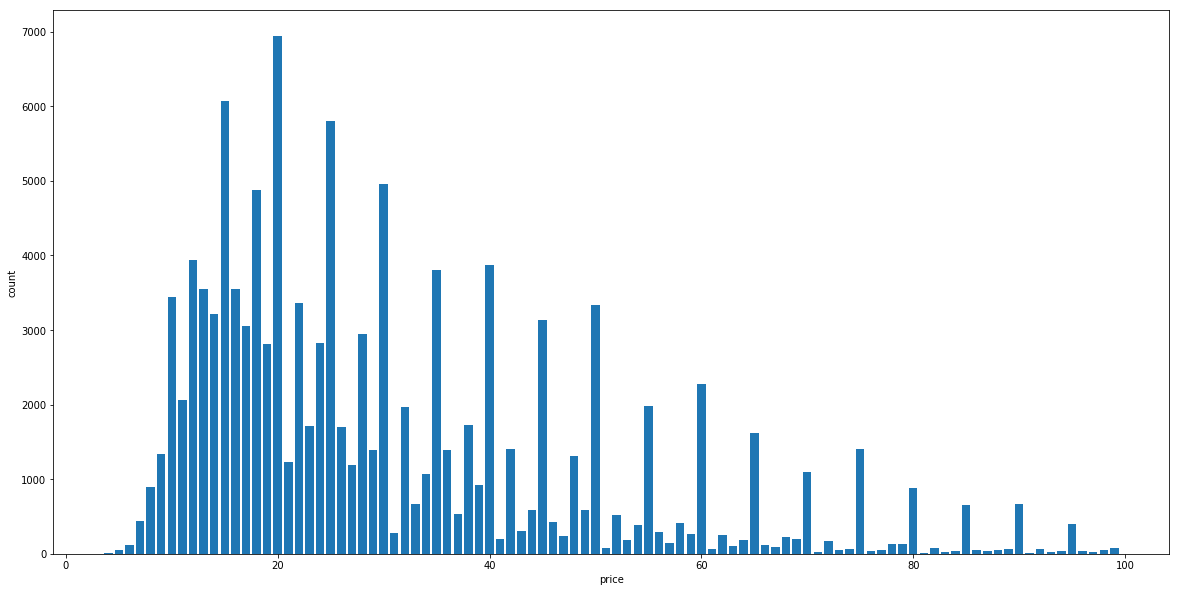

In [222]:
prices_distribution = pd.DataFrame(reviews.groupby('price')['description'].count())
prices_distribution.reset_index(inplace=True)
plt.figure(figsize=(20,10))
plt.xlabel('price')
plt.ylabel('count')
plt.bar(prices_distribution['price'], prices_distribution['description'])


In [225]:
prices_distribution['modby5']=0
prices_distribution.ix[prices_distribution['price']%5==0, 'modby5'] = 1
prices_distribution

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,price,description,modby5
0,4.0,11,0
1,5.0,46,1
2,6.0,120,0
3,7.0,433,0
4,8.0,892,0
5,9.0,1339,0
6,10.0,3439,1
7,11.0,2058,0
8,12.0,3934,0
9,13.0,3549,0


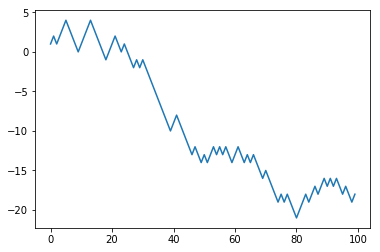

In [113]:
# RUN ALL THE CODE BEFORE YOU START
import numpy as np
 #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 


def create_random_walk():
    x = np.random.choice([-1,1],size=100, replace=True) # Sample with replacement from (-1, 1)
    return np.cumsum(x) # Return the cumulative sum of the elements
X = create_random_walk()
Y = create_random_walk()
Z = create_random_walk()

# Plotting functionality starts here
#plt.plot(X)
#plt.plot(Y)
#plt.plot(Z)

pylab.plot(a, label='aa');
pylab.show()

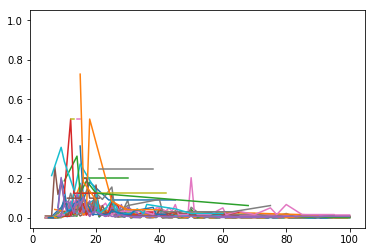

In [120]:
import numpy as np
import pylab 

for country in pd.unique(reviews_region_prices['country']):
    prices_count = np.unique(reviews_region_prices[reviews_distribution_count['country'] == country]['price'],return_counts=True)
    pylab.plot(prices_count[0], prices_count[1]/len(reviews_region_prices[reviews_distribution_count['country'] == country]), label=country)
pylab.legend(loc='upper left')
#pylab.ylim(-1.5, 2.0)
pylab.show()


In [83]:
pd.unique(reviews_region_prices['country'])

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China'], dtype=object)

In [74]:
reviews_distribution_count

,price
,unique
country,
Argentina,"[30.0, 13.0, 12.0, 22.0, 10.0, 15.0, 37.0, 14...."
Armenia,"[14.0, 15.0]"
Australia,"[18.0, 20.0, 40.0, 30.0, 12.0, 29.0, 15.0, 70...."
Austria,"[12.0, 17.0, 24.0, 23.0, 18.0, 20.0, 13.0, 16...."
Bosnia and Herzegovina,"[13.0, 12.0]"
Brazil,"[36.0, 31.0, 20.0, 10.0, 25.0, 15.0, 23.0, 26...."
Bulgaria,"[9.0, 11.0, 14.0, 22.0, 8.0, 10.0, 26.0, 16.0,..."
Canada,"[30.0, 12.0, 32.0, 38.0, 24.0, 23.0, 80.0, 20...."
